In [1]:
import numpy as np
import pandas as pd

import itertools
import math

import matplotlib.pyplot as plt
from matplotlib import gridspec

from tqdm.notebook import tqdm
import pymorphy2

import nltk
from nltk.tokenize import RegexpTokenizer

from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

from sklearn.feature_extraction.text import CountVectorizer

import tqdm

Smol playground

In [3]:
from pymystem3 import Mystem
mystem = Mystem()
text = 'Как насчёт небольшого стемминга'
lemmas = mystem.lemmatize(text)
print(''.join(lemmas))

Installing mystem to /home/art-bash/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


как насчет небольшой стемминг



In [8]:
convert = {
    'A': 'ADJ',
    'ADV': 'ADV',
    'ADVPRO': 'ADV',
    'ANUM': 'ADJ',
    'APRO': 'DET',
    'COM': 'ADJ',
    'CONJ': 'SCONJ',
    'INTJ': 'INTJ',
    'NONLEX': 'X',
    'NUM': 'NUM',
    'PART': 'PART',
    'PR': 'ADP',
    'S': 'NOUN',
    'SPRO': 'PRON',
    'UNKN': 'X',
    'V': 'VERB'
}

In [16]:
def tag(word='пожар', stemmer=None):
    if stemmer is None:
        from pymystem3 import Mystem
        stemmer = Mystem()
    processed = stemmer.analyze(word)[0]
    lemma = processed["analysis"][0]["lex"].lower().strip()
    pos = processed["analysis"][0]["gr"].split(',')[0]
    pos = pos.split('=')[0].strip()
    pos = convert[pos]
    tagged = lemma + '_' + pos
    return tagged
tag('какой')

'какой_DET'

In [17]:
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
model = api.load("word2vec-ruscorpora-300")

[==================================================] 100.0% 198.8/198.8MB downloaded


In [ ]:
#raw_data = pd.read_csv('doroga_v_les.csv', error_bad_lines=False).fillna('')
#raw_data

In [3]:
#data = pd.DataFrame(raw_data.apply(''.join, axis=1))
#data.columns = ['text']
#data.to_csv('doroga_v_les.csv')

In [4]:
data = pd.read_csv('../dat/glue_split_owner.txt', sep=';', header=None)
data.columns = ['text']

In [5]:
nltk.download('punkt')
sent_tokenizer = lambda sent: nltk.sent_tokenize(sent, language="russian")

[nltk_data] Downloading package punkt to /home/art-bash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
nltk.download('stopwords')
# pymorphy2 анализатор
morph = pymorphy2.MorphAnalyzer()
# стоп слова из nltk
stops = nltk.corpus.stopwords.words('russian')

[nltk_data] Downloading package stopwords to /home/art-
[nltk_data]     bash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def proccess_text(text):
    text= text.lower()
    sents = sent_tokenizer(text)
    words = list(
        itertools.chain.from_iterable(
            word_tokenizer.tokenize_sents(sents)))
    return [x for x in [morph.normal_forms(word)[0] for word in words ]\
            if x not in stops]

In [9]:
word_tokenizer = RegexpTokenizer(r'[a-zа-яёЁА-ЯA-Z]\w+\'?\w*')

data_text = data['text']

for i in tqdm.tqdm(range(len(data))):
     data_text.iloc[i] = ' '.join(proccess_text(data_text.iloc[i]))
        
data['text'] = data_text
#data_text.columns = ['text']
data.to_csv('doroga_v_les_proccessed.csv')
data

100%|██████████| 63860/63860 [02:05<00:00, 507.71it/s]


,text
0,ассалам алейкума заказать чёрный долго ждать ц...
1,дело реза хийл понять чёрный цвет вариант мочь...
2,всё баркал а51 гб ассалам алейкума цена ала бр...
3,розовый цвет наличие мм скидка мочь предложить...
4,суббота забрать сестра
...,...
63855,суртехь гайта йиш хир йари хьа ваш стриза ёрш
63856,а51 цена
63857,здравствуйте айрподс вроде оригинал глянец вес...
63858,думать просто жалко


In [10]:
#data_text = pd.read_csv('doroga_v_les_proccessed.csv', sep=';')
#data_text

## Filter

In [11]:
#data_text = pd.DataFrame(data_text.apply(replace('добрый', ''), axis=1))
#data_text['text'] = data_text['text'].str.replace('добрый','')
#data_text['text'] = data_text['text'].str.replace('день','')
#data_text['text'] = data_text['text'].str.replace('здравствуйте','')
#data_text['text'] = data_text['text'].str.replace('утро','')
#data_text['text'] = data_text['text'].str.replace('спасибо','')

#data

In [12]:
tokenizer = RegexpTokenizer(r'[a-zа-яёЁА-ЯA-Z]\w+\'?\w*')
data['tokenized_text'] = data['text'].apply(lambda row: tokenizer.tokenize(row))

data

,text,tokenized_text
0,ассалам алейкума заказать чёрный долго ждать ц...,"[ассалам, алейкума, заказать, чёрный, долго, ж..."
1,дело реза хийл понять чёрный цвет вариант мочь...,"[дело, реза, хийл, понять, чёрный, цвет, вариа..."
2,всё баркал а51 гб ассалам алейкума цена ала бр...,"[всё, баркал, а51, гб, ассалам, алейкума, цена..."
3,розовый цвет наличие мм скидка мочь предложить...,"[розовый, цвет, наличие, мм, скидка, мочь, пре..."
4,суббота забрать сестра,"[суббота, забрать, сестра]"
...,...,...
63855,суртехь гайта йиш хир йари хьа ваш стриза ёрш,"[суртехь, гайта, йиш, хир, йари, хьа, ваш, стр..."
63856,а51 цена,"[а51, цена]"
63857,здравствуйте айрподс вроде оригинал глянец вес...,"[здравствуйте, айрподс, вроде, оригинал, гляне..."
63858,думать просто жалко,"[думать, просто, жалко]"


# Tutorial

In [13]:
data['tokenized_text']

0        [ассалам, алейкума, заказать, чёрный, долго, ж...
1        [дело, реза, хийл, понять, чёрный, цвет, вариа...
2        [всё, баркал, а51, гб, ассалам, алейкума, цена...
3        [розовый, цвет, наличие, мм, скидка, мочь, пре...
4                               [суббота, забрать, сестра]
                               ...                        
63855    [суртехь, гайта, йиш, хир, йари, хьа, ваш, стр...
63856                                          [а51, цена]
63857    [здравствуйте, айрподс, вроде, оригинал, гляне...
63858                              [думать, просто, жалко]
63859    [буьс, дик, хилый, макс, гб, небесный, голубой...
Name: tokenized_text, Length: 63860, dtype: object

## Filter greetings

In [14]:
def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]

get_most_freq_words([word for messege in data.tokenized_text for word in messege],10)

[('айфон', 13403),
 ('сколько', 12883),
 ('ассалам', 12112),
 ('рассрочка', 10871),
 ('цена', 9737),
 ('алейкума', 7825),
 ('алайкума', 7742),
 ('брат', 7386),
 ('гб', 7377),
 ('стоить', 7351)]

100%|██████████| 35/35 [52:19<00:00, 89.71s/it]


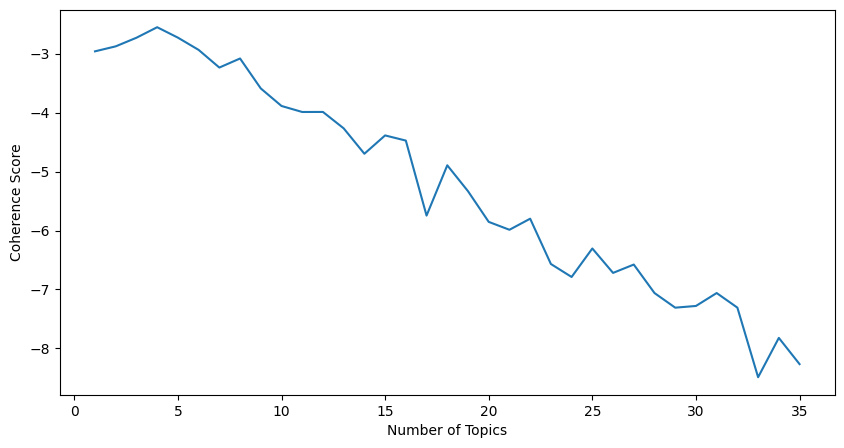

In [15]:
messeges_dictionary = Dictionary(data.tokenized_text)

messeges_corpus = [messeges_dictionary.doc2bow(messege) for messege in data.tokenized_text]

# compute coherence
messeges_coherence = []
for nb_topics in tqdm.tqdm(range(1,36)):
    lda = LdaModel(messeges_corpus, num_topics = nb_topics, id2word = messeges_dictionary, passes=10)
    cohm = CoherenceModel(model=lda, corpus=messeges_corpus, dictionary=messeges_dictionary, coherence='u_mass')
    coh = cohm.get_coherence()
    messeges_coherence.append(coh)

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,36),messeges_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

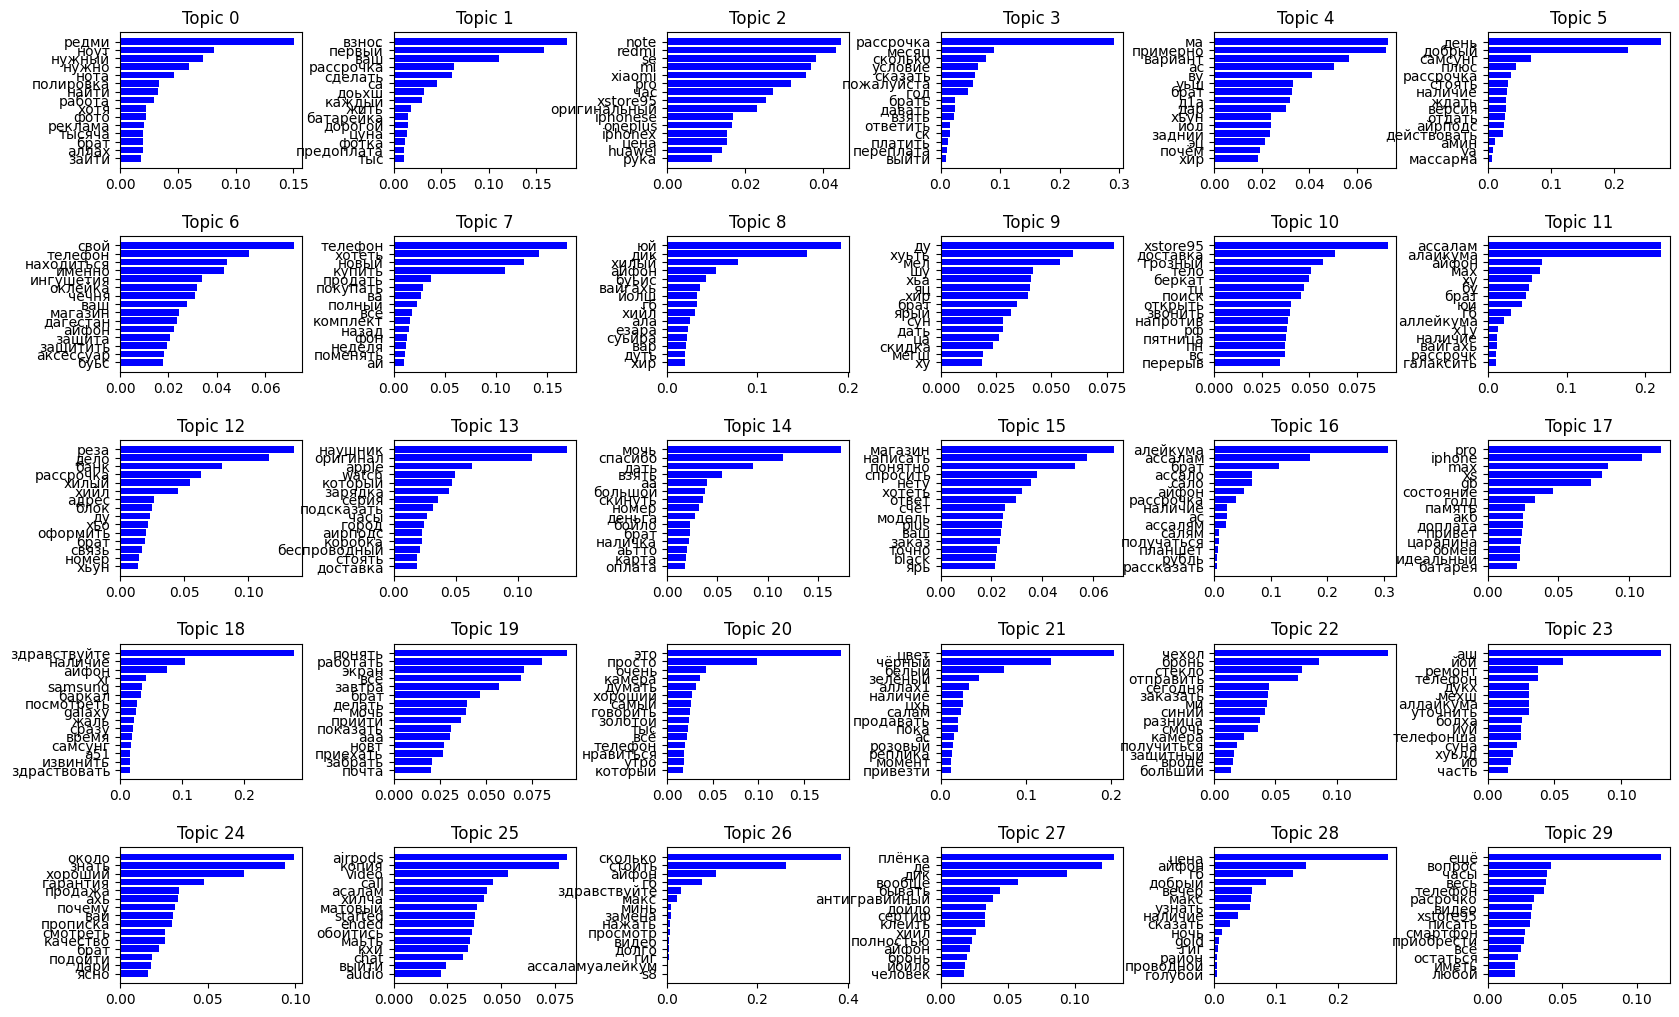

In [16]:
k = 30 # number of topics

messeges_lda = LdaModel(messeges_corpus, num_topics = k, id2word = messeges_dictionary, passes=10)

def plot_top_words(lda=messeges_lda, nb_topics=k, nb_words=15):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))
        
plot_top_words()

## Hrabovoy

In [ ]:
from sklearn.utils import shuffle

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
texts = data['text'].values.tolist()
topics = data['tag'].values.tolist()

texts, topics = shuffle(texts, topics)

texts_train = texts[:45]
texts_test = texts[45:]

topics_train = topics[:45]
topics_test = topics[45:]

In [ ]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(texts_train)

In [ ]:
train_doc_vectors = vectorizer.transform(texts_train)

In [ ]:
lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(train_doc_vectors)

In [ ]:
feature_train = lda.transform(train_doc_vectors)
topics_train = np.array(topics_train)

In [ ]:
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(feature_train, topics_train)

In [ ]:
test_doc_vectors = vectorizer.transform(texts_test)
feature_test = lda.transform(test_doc_vectors)

In [ ]:
pred = classifier.predict(feature_test)
pred

In [ ]:
topics_test = np.array(topics_test)
topics_test

In [ ]:
print(classification_report(topics_test, pred, zero_division=1))